#LUIS ANDRES MORAN ALVARADO

#1) Diseñar una capa en keras que transforme imágenes a color en escala de grises. Pueden usar la base de datos mnist o cualquier otra para hacer las pruebas.

In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt

#intento 1

PREPOCESAMOS LAS IMAGENES MNIST

In [51]:
# Cargar la base de datos MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar las imágenes y ajustar la forma
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0



In [52]:
class RGBToGrayscale(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(RGBToGrayscale, self).__init__(**kwargs)

    def call(self, inputs):
        # Verificar si la imagen ya está en escala de grises
        if inputs.shape[-1] == 1:
            return inputs
        else:
            # Convertir la imagen RGB a escala de grises
            return tf.image.rgb_to_grayscale(inputs)


In [54]:
# Crear el modelo con la capa personalizada RGBToGrayscale
model = tf.keras.Sequential([
    RGBToGrayscale(input_shape=(28, 28, 1)),  # Supongamos que las imágenes son de tamaño 28x28
])

# Realizar la predicción (convertir a escala de grises)
gray_train_images = model.predict(train_images)
gray_test_images = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


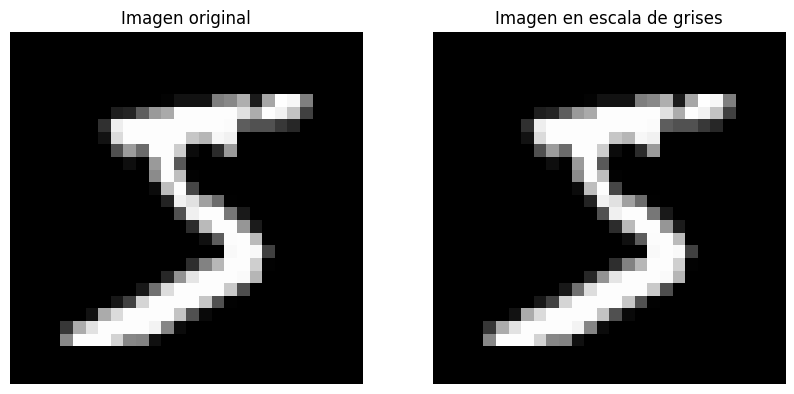

In [55]:
# Mostrar una imagen de ejemplo original y su versión en escala de grises
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(train_images[0, :, :, 0], cmap='gray')  # Mostrar solo el canal de intensidad
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_train_images[0, :, :, 0], cmap='gray')  # Mostrar solo el canal de intensidad
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.show()


#intento 2

Como vemos el set de imagenes MNIST Originalmente esta blanco y negro debido a que los colores no ayudan al set (debido a que son para entrenar y probar numero y para eso no se necesitan colores) por ende lo haremos con una imagen

El siguiente intento marca error ya que la imagen debe ser en los siguientes formatos JPEG, PNG, GIF, BMP

In [57]:
# Función para convertir imágenes RGB a escala de grises
def rgb_to_grayscale(image):
    return tf.image.rgb_to_grayscale(image)

# Definir una capa Lambda para aplicar la función personalizada
gray_scale_layer = tf.keras.layers.Lambda(rgb_to_grayscale)

# Modelo de ejemplo con la capa Lambda
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None, None, 3)),  # Supongamos que las imágenes son de tamaño variable
    gray_scale_layer
])

# Cargar una imagen a color de ejemplo
image_path = "chopper.jpg"  # Cambia esto por la ruta de tu imagen
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [224, 224])  # Redimensionar la imagen si es necesario

# Normalizar la imagen
image = image / 255.0

# Realizar la predicción (convertir a escala de grises)
gray_image = model.predict(tf.expand_dims(image, 0))[0]

# Mostrar las imágenes original y en escala de grises
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(gray_image, axis=-1), cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.show()

InvalidArgumentError: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeJpeg]

#intento 3

Cambiamos ahora con una imagen png y probamos

1/1 [==============================] - 0s 128ms/step


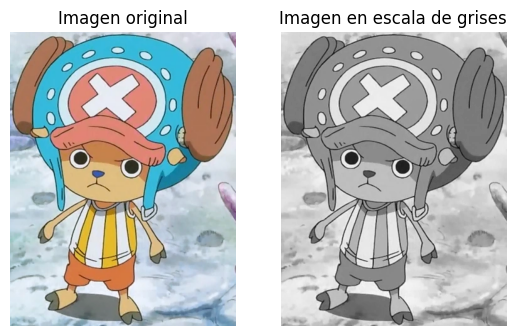

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

class RGBToGrayscale(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(RGBToGrayscale, self).__init__(**kwargs)

    def call(self, inputs):
        # Verificar si la imagen ya está en escala de grises
        if inputs.shape[-1] == 1:
            return inputs
        else:
            # Convertir la imagen RGB a escala de grises
            return tf.image.rgb_to_grayscale(inputs)

# Crear el modelo con la capa personalizada RGBToGrayscale
model = tf.keras.Sequential([
    RGBToGrayscale(input_shape=(None, None, 3)),  # Supongamos que las imágenes son de tamaño variable
])

# Cargar la imagen de ejemplo (utilizando Pillow)
image_path = "prueba.PNG"
image = Image.open(image_path)
image = tf.convert_to_tensor(image)  # Convertir la imagen de Pillow a un tensor de TensorFlow

# Normalizar la imagen
image = tf.cast(image, tf.float32) / 255.0

# Realizar la predicción (convertir a escala de grises)
gray_image = model.predict(tf.expand_dims(image, 0))

# Mostrar la imagen original y la imagen en escala de grises
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(gray_image, axis=0), cmap='gray')  # Ajustar las dimensiones
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.show()


#2) Entrena una red neuronal para que reproduzca las siguientes funciones en el intervalo de [-1,1]. Graficar la solución de la red en conjunto con la gráfica de la función

(a) 3 sin(πx)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Definir  función objetivo
def objetivo(x):
    return 3 * np.sin(np.pi * x)

In [62]:
# datos de entrenamiento
x_train = np.linspace(-1, 1, 100)
y_train = objetivo(x_train)

In [63]:
# modelo
model = Sequential([
    Dense(10, activation='tanh', input_shape=(1,)),
    Dense(1)
])

# Compilar modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar  modelo
history = model.fit(x_train, y_train, epochs=10000, verbose=0)

In [64]:
# Evalualuacion de modelo en el conjunto de entrenamiento
loss = model.evaluate(x_train, y_train, verbose=0)
print("Loss:", loss)

Loss: 0.00143345701508224


In [65]:
#  datos para la visualización
x_test = np.linspace(-1, 1, 100)
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


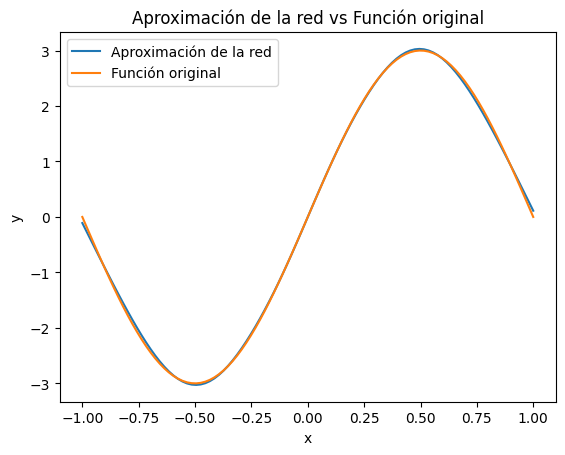

In [66]:
# Graficar la solución de la red junto con la función original
plt.plot(x_test, y_pred, label="Aproximación de la red")
plt.plot(x_test, objetivo(x_test), label="Función original")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximación de la red vs Función original")
plt.legend()
plt.show()

(b) 1 + 2x+ 4x3

Loss: 0.002554382663220167
4/4 [==============================] - 0s 4ms/step


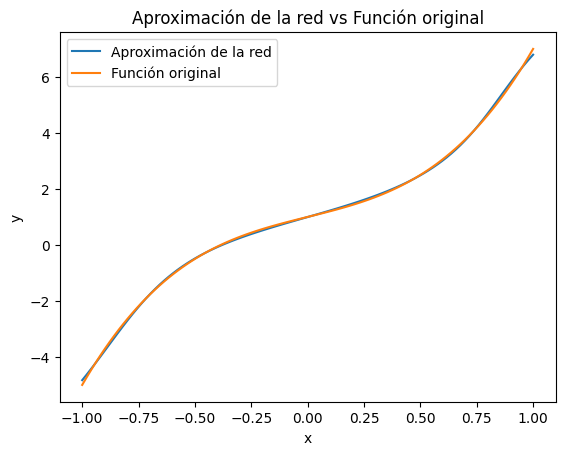

In [44]:
# Definir función objetivo
def target_function(x):
    return 1 + 2*x + 4*x*x*x

# datos de entrenamiento
x_train = np.linspace(-1, 1, 100)
y_train = target_function(x_train)

# Construir  modelo
model = Sequential([
    Dense(10, activation='tanh', input_shape=(1,)),
    Dense(10, activation='tanh', input_shape=(1,)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=1500, verbose=0)

# Evaluacion del modelo en el conjunto de entrenamiento
loss = model.evaluate(x_train, y_train, verbose=0)
print("Loss:", loss)

#  datos para la visualización
x_test = np.linspace(-1, 1, 100)
y_pred = model.predict(x_test)

# Graficar la solución de la red junto con la función original
plt.plot(x_test, y_pred, label="Aproximación de la red")
plt.plot(x_test, target_function(x_test), label="Función original")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximación de la red vs Función original")
plt.legend()
plt.show()

3. Diseñar una capa entrenable que represente un polinomio grado 3: f(x) = a0+a1x+a2x2+a3x3. Los parámetros entrenables son los coeficientes a0,a1,a2,a3. Posteriormente, entrenarla para ajustarla a la función f(x) =cos(2x) en el intervalo [-1,1].

intento 1 con dropout al 20%

Loss: 0.017654061317443848
4/4 [==============================] - 0s 3ms/step


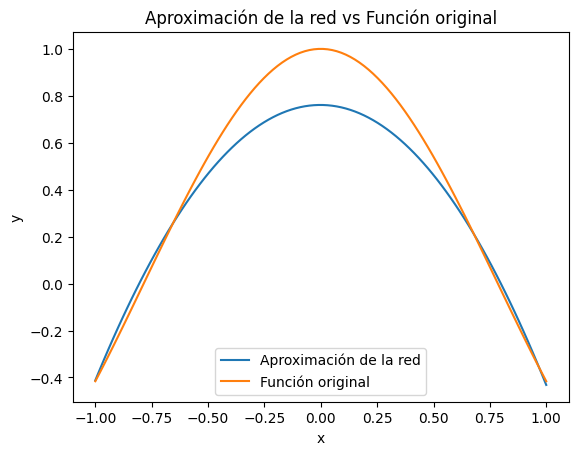

In [68]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Layer

# Definir  capa personalizada de polinomio de grado 3
class PolynomialLayer(Layer):
    def __init__(self):
        super(PolynomialLayer, self).__init__()
        # Inicializar  coeficientes de polinomio como variables entrenables
        self.a0 = tf.Variable(initial_value=0.0, trainable=True)
        self.a1 = tf.Variable(initial_value=0.0, trainable=True)
        self.a2 = tf.Variable(initial_value=0.0, trainable=True)
        self.a3 = tf.Variable(initial_value=0.0, trainable=True)

    def call(self, inputs):
        # Calcular  polinomio de grado 3: f(x) = a0 + a1*x + a2*x^2 + a3*x^3
        x = inputs
        return self.a0 + self.a1*x + self.a2*x**2 + self.a3*x**3

# Definir  función objetivo
def target_function(x):
    return np.cos(2*x)

# Generar datos de entrenamiento
x_train = np.linspace(-1, 1, 100)
y_train = target_function(x_train)

# Definir el modelo con Dropout
model = tf.keras.Sequential([
    PolynomialLayer(),
    Dropout(0.2),
])

# Compilacion del modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=2000, verbose=0)

# Evaluacion del modelo  del conjunto de entrenamiento
loss = model.evaluate(x_train, y_train, verbose=0)
print("Loss:", loss)

# Generar datos para la visualización
x_test = np.linspace(-1, 1, 100)
y_pred = model.predict(x_test)

# Graficar la solución de la red junto con la función original
import matplotlib.pyplot as plt
plt.plot(x_test, y_pred, label="Aproximación de la red")
plt.plot(x_test, target_function(x_test), label="Función original")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximación de la red vs Función original")
plt.legend()
plt.show()

intento 2 con dropout al 10%

Loss: 0.0058680372312664986
4/4 [==============================] - 0s 3ms/step


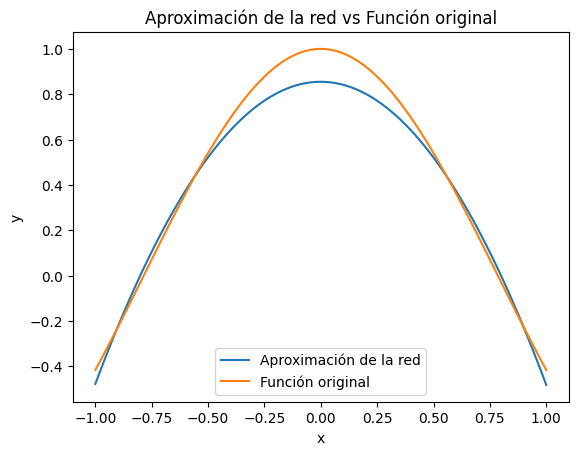

In [67]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Layer

# Definir  capa personalizada de polinomio de grado 3
class PolynomialLayer(Layer):
    def __init__(self):
        super(PolynomialLayer, self).__init__()
        # Inicializar  coeficientes de polinomio como variables entrenables
        self.a0 = tf.Variable(initial_value=0.0, trainable=True)
        self.a1 = tf.Variable(initial_value=0.0, trainable=True)
        self.a2 = tf.Variable(initial_value=0.0, trainable=True)
        self.a3 = tf.Variable(initial_value=0.0, trainable=True)

    def call(self, inputs):
        # Calcular  polinomio de grado 3: f(x) = a0 + a1*x + a2*x^2 + a3*x^3
        x = inputs
        return self.a0 + self.a1*x + self.a2*x**2 + self.a3*x**3

# Definir  función objetivo
def target_function(x):
    return np.cos(2*x)

# Generar datos de entrenamiento
x_train = np.linspace(-1, 1, 100)
y_train = target_function(x_train)

# Definir el modelo con Dropout
model = tf.keras.Sequential([
    PolynomialLayer(),
    Dropout(0.1),  # Tasa de dropout del 10%
])

# Compilacion del modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=2000, verbose=0)

# Evaluacion del modelo  del conjunto de entrenamiento
loss = model.evaluate(x_train, y_train, verbose=0)
print("Loss:", loss)

# Generar datos para la visualización
x_test = np.linspace(-1, 1, 100)
y_pred = model.predict(x_test)

# Graficar la solución de la red junto con la función original
import matplotlib.pyplot as plt
plt.plot(x_test, y_pred, label="Aproximación de la red")
plt.plot(x_test, target_function(x_test), label="Función original")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximación de la red vs Función original")
plt.legend()
plt.show()

intento 3 sin dropout

Loss: 0.001962409820407629
4/4 [==============================] - 0s 3ms/step


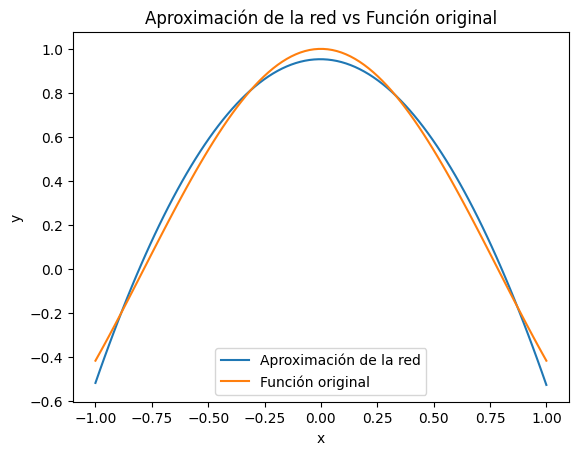

In [69]:


# Definir  capa personalizada de polinomio de grado 3
class PolynomialLayer(Layer):
    def __init__(self):
        super(PolynomialLayer, self).__init__()
        # Inicializar  coeficientes de polinomio como variables entrenables
        self.a0 = tf.Variable(initial_value=0.0, trainable=True)
        self.a1 = tf.Variable(initial_value=0.0, trainable=True)
        self.a2 = tf.Variable(initial_value=0.0, trainable=True)
        self.a3 = tf.Variable(initial_value=0.0, trainable=True)

    def call(self, inputs):
        # Calcular  polinomio de grado 3: f(x) = a0 + a1*x + a2*x^2 + a3*x^3
        x = inputs
        return self.a0 + self.a1*x + self.a2*x**2 + self.a3*x**3

# Definir  función objetivo
def target_function(x):
    return np.cos(2*x)

# Generar datos de entrenamiento
x_train = np.linspace(-1, 1, 100)
y_train = target_function(x_train)

# Definir el modelo con Dropout
model = tf.keras.Sequential([
    PolynomialLayer(),
])

# Compilacion del modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=2000, verbose=0)

# Evaluacion del modelo  del conjunto de entrenamiento
loss = model.evaluate(x_train, y_train, verbose=0)
print("Loss:", loss)

# Generar datos para la visualización
x_test = np.linspace(-1, 1, 100)
y_pred = model.predict(x_test)

# Graficar la solución de la red junto con la función original
import matplotlib.pyplot as plt
plt.plot(x_test, y_pred, label="Aproximación de la red")
plt.plot(x_test, target_function(x_test), label="Función original")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximación de la red vs Función original")
plt.legend()
plt.show()